# Image Preprocessing Techniques

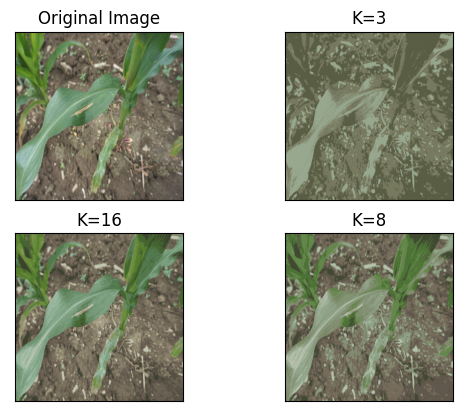

Done


In [65]:
# import Opencv
import cv2

# import Numpy
import numpy as np
import glob, os
import matplotlib.pyplot as plt
import pandas as pd
os.chdir("/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train")
# read a image using imread
img = cv2.imread('DSC00025-ArithmeticAdd.jpg')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#equ = cv2.equalizeHist(gray)
# stacking images side-by-side
#res = np.hstack((gray, equ))
# show image input vs output
#image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#LAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#YCrCb  = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

#plt.imshow(image)
#plt.show()
# plt.imshow(gray)
# plt.show()
# plt.imshow(equ)

# plt.show()
# plt.imshow(hsv)

# plt.show()

#plt.imshow(YCrCb)

#plt.show()

#Color quantization
# read input image
#img = cv2.imread('horizon.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
   
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    return res2

res1 = colorQuant(Z, 3, criteria)
res2 = colorQuant(Z, 16, criteria)
res3 = colorQuant(Z, 8, criteria)

plt.subplot(221),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=3'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=16'), plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8'), plt.xticks([]), plt.yticks([])

plt.show()

print('Done')
                 

# Confirming Memory Consumption


In [1]:
# import Opencv
import cv2
import shutil
# import Numpy
#import numpy as np
import numpy as ppool

import glob, os
import matplotlib.pyplot as plt
import pandas as pd
os.chdir("/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train-MP-CV2Normalized")
for file in glob.glob("*.jpg"):

    img = cv2.imread(file)

    name=file.split('-CV2Normalized.jpg')

    fullname=name[0]+'.jpg'
    cv2.imwrite('check/'+fullname, img)

# Converting From One Color Space To Another

In [9]:
# import Opencv
import cv2
import shutil
# import Numpy
#import numpy as np
import numpy as ppool

import glob, os
import matplotlib.pyplot as plt
import pandas as pd
os.chdir("/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images")
# images=[]
# for file in glob.glob("*.jpg"):
#     img = cv2.imread(file)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     name=file.split('.')
#     fullname=name[0]+'-GRAY.jpg'
#     cv2.imwrite('../'+fullname, gray)
# #     #os.remove(file)
#     img = cv2.imread(file)
#     norm = ppool.zeros((800,800))
#     final = cv2.normalize(img,  norm, 0, 255, cv2.NORM_MINMAX)
#     name=file.split('.')

#     fullname=name[0]+'-CV2Normalized.jpg'
#     cv2.imwrite('../'+fullname, final)

for file in glob.glob("*-GRAY.jpg"):
    shutil.move(file, 'test2-Original-GRAY/'+file)
    #os.remove(file)

# Color Quantization

In [12]:
# import Opencv
import cv2
import shutil
# import Numpy
import numpy as np
#import numpy as ppool

import glob, os
import matplotlib.pyplot as plt
import pandas as pd
os.chdir("/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images")
# for file in glob.glob("*.jpg"):
#     img = cv2.imread(file)
#     Z = img.reshape((-1,3))
    
#     # convert to np.float32
#     Z = np.float32(Z)
    
#     # define criteria, number of clusters(K) and apply kmeans()
#     criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
#     def colorQuant(Z, K, criteria):

#         ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
   
#         # Now convert back into uint8, and make original image
#         center = np.uint8(center)
#         res = center[label.flatten()]
#         res2 = res.reshape((img.shape))
#         return res2

#     CQImg = colorQuant(Z, 32, criteria)
#     name=file.split('.')

#     fullname=name[0]+'-CQ32-20.jpg'
#     cv2.imwrite('../'+fullname, CQImg)
for file in glob.glob("*-CQ32-20.jpg"):
    #os.remove(file)

# Calculating the size of a folder

In [2]:

import os
os.chdir("/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train-MP-CV2Normalized/check")

size=sum(os.path.getsize(f) for f in os.listdir('.') if os.path.isfile(f))
print(size)

343316134


# Generating CSV Annotations from labelimg XML annotations 

In [7]:
%cd /notebooks/fasterRCNNRealMaizeNLB/scripts/preprocessing
!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python generate_tfrecord2.py -x /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/Test2 -l /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/Test2/label_map.pbtxt -o /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/Test2/Test2.record -c /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/Test2/Test2.csv

/notebooks/fasterRCNNRealMaizeNLB/scripts/preprocessing
Successfully created the TFRecord file: /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/Test2/Test2.record
Successfully created the CSV file: /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/Test2/Test2.csv


# Getting Names of Uploaded Images ...Helps when not all images were uploaded

In [26]:
import glob, os
import pandas as pd
os.chdir("/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train-CV2Norm-MP")
trainImages=[]
for file in glob.glob("*.jpg"):
    trainImages.append(file)

df=pd.DataFrame(trainImages)
print(len(trainImages))
#print(df.head())
#df.to_csv('aaploadedImages.csv', index=False)



2575


# Renaming Images

In [27]:
import glob, os
import pandas as pd
os.chdir("/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train")
#trainImages=[]
for file in glob.glob("*.jpg"):
    newName = file.replace("-", "_" )
    #os.rename(current_file_name, new_file_name)

    os.rename(file, newName)



# Chnaging Names of Images in Train CSV

In [24]:
import glob, os
import pandas as pd
os.chdir("/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train")
trainAnnotations=pd.read_csv('all1800HHTrainAnnotations.csv')
print(trainAnnotations.head())
for row in trainAnnotations.itertuples():
    oldname=row.filename
    newName=oldname.replace("-", "_" )
    trainAnnotations.at[row.Index, 'filename'] = newName

#print(trainAnnotations.head())
trainAnnotations.to_csv('annotationsTrain.csv', index=False)





                          filename  width  height class_name        xmin  \
0       DSC00025-ArithmeticAdd.jpg   1333    1333        NLB  414.118680   
1  DSC00025-ArithmeticMultiply.jpg   1333    1333        NLB  414.118680   
2       DSC00025-GaussianNoise.jpg   1333    1333        NLB  414.118680   
3                  DSC00025-HF.jpg   1333    1333        NLB  696.714700   
4             DSC00025-Resized.jpg   1333    1333        NLB  414.118683   

         ymin        xmax        ymax  
0  549.196000  636.285340  687.827940  
1  549.196000  636.285340  687.827940  
2  549.196000  636.285340  687.827940  
3  549.196000  918.881300  687.827940  
4  549.195984  636.285339  687.827942  


# Identifying Corrupt Images

In [23]:
from struct import unpack
import os
os.chdir("/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train-CV2Norm-MP")
bads=[]


marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()
    
    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]            
            if len(data)==0:
                break        



for file in glob.glob("*.jpg"):
 # image = osp.join(root_img,img)
    image = JPEG(file) 
    try:
        image.decode()   
    except:
        bads.append(file)


# for name in bads:
#     os.remove(name)

print('Total:' +str(len(bads)) )
print(bads)

NameError: name 'glob' is not defined

# Creating a folder training Folder


In [4]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
import os
from datetime import datetime;
from pytz import timezone
startTime = datetime.now(timezone('Africa/Addis_Ababa'))
timeinString = startTime.strftime('%d-%m-%Y_%H:%M:%S').replace("-0", "-") #.replace("03", "3")
modelLocation='models/my_faster_rcnn_inception_resnet_v2/'+timeinString
os.mkdir(modelLocation)

print(modelLocation)
#!mkdir -p images



/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
models/my_faster_rcnn_inception_resnet_v2/18-4-2023_13:57:14


# Checking the format of image

In [36]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train
from PIL import Image

img = Image.open('DSC00025_Resized.jpg')
print(img.format)  

/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train
JPEG


# Deleting Unrequired Folders

In [23]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/models/my_faster_rcnn_inception_resnet_v2

/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/models/my_faster_rcnn_inception_resnet_v2


In [31]:
!rm -rf CV2Norm-mp-4000-2

In [4]:
from datetime import datetime;
from pytz import timezone
ct1 = datetime.now(timezone('Africa/Addis_Ababa'))
ct2 = datetime.now(timezone('Africa/Addis_Ababa'))
timeinString = ct1.strftime('%Y-%m-%d %H:%M:%S')
print('Current time is: ' +timeinString )
timeDifference=ct2-ct1
timeDifferenceInSeconds = timeDifference.total_seconds()
print('Time Difference in seconds is: '+str(timeDifferenceInSeconds))

Current time is: 2023-03-27 15:47:22
Time Difference in seconds is: 7.4e-05


In [3]:
!which /notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python

/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python


In [6]:
!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python --version

/bin/bash: /notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python: No such file or directory


In [5]:
!pwd


/notebooks/fasterRCNNRealMaizeNLB/models/research


In [2]:
import tensorflow as tf
print(tf.__version__)

2023-03-28 13:59:30.920813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 13:59:32.896575: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64
2023-03-28 13:59:32.896986: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64
2023-03-28 13:59:32.896997: W tensorflow/compiler/tf2tensorrt/utils/py_utils

2.11.1


In [9]:
import tensorflow as tf;
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

2023-03-28 12:15:17.787107: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 12:15:17.874833: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 12:15:17.875110: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 12:15:17.876254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

tf.Tensor(170.98611, shape=(), dtype=float32)


In [5]:
import nvidia_smi
import tensorflow as tf
nvidia_smi.nvmlInit()

handle = nvidia_smi.nvmlDeviceGetHandleByIndex(0)
# card id 0 hardcoded here, there is also a call to get all available card ids, so we could iterate

info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)
print(tf.test.is_gpu_available(
    cuda_only=True, min_cuda_compute_capability=None
))
print("Total memory:", info.total)
print("Free memory:", info.free)
print("Used memory:", info.used)

nvidia_smi.nvmlShutdown()

ModuleNotFoundError: No module named 'nvidia_smi'

In [1]:
!nvidia-smi #gives more details about the GPU in use

Thu Jul  6 04:13:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.116.04   Driver Version: 525.116.04   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A6000    Off  | 00000000:00:05.0 Off |                  Off |
| 30%   34C    P8    17W / 300W |      1MiB / 49140MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Updating LD library path to sort out tensorRT warings

In [10]:
%env

{'KUBERNETES_SERVICE_PORT': '443',
 'KUBERNETES_PORT': 'tcp://10.43.0.1:443',
 'HOSTNAME': 'nh7id0nqyh',
 'JUPYTER_TOKEN': '<hidden>',
 'LD_LIBRARY_PATH': '/usr/local/cuda-11.6/lib64',
 'HOME': '/root',
 'PAPERSPACE_CLUSTER_ID': 'clg07azjl',
 'PAPERSPACE_NOTEBOOK_REPO_ID': 'ru37fvz3n83vyzd',
 'PIP_DISABLE_PIP_VERSION_CHECK': '1',
 'KUBERNETES_PORT_443_TCP_ADDR': '10.43.0.1',
 'PATH': '/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/root/.local/bin:/usr/local/cuda-11.6/bin',
 'KUBERNETES_PORT_443_TCP_PORT': '443',
 'DISABLE_JUPYTER': 'true',
 'KUBERNETES_PORT_443_TCP_PROTO': 'tcp',
 'PAPERSPACE_METRIC_WORKLOAD_TYPE': 'notebook',
 'LANG': 'C.UTF-8',
 'DEBIAN_FRONTEND': 'noninteractive',
 'SHELL': '/bin/bash',
 'APT_INSTALL': 'apt-get install -y --no-install-recommends',
 'KUBERNETES_SERVICE_PORT_HTTPS': '443',
 'KUBERNETES_PORT_443_TCP': 'tcp://10.43.0.1:443',
 'PAPERSPACE_FQDN': 'nh7id0nqyh.clg07azjl.paperspacegradient.com',
 'KUBERNETES_SERVICE_HOST': '10.43.0.1',
 'PWD':

In [1]:
%env LD_LIBRARY_PATH=/usr/local/cuda-11.6/lib64:/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/lib/python3.9/site-packages/tensorrt 

#%env LD_LIBRARY_PATH=/usr/local/cuda-11.8/include:/usr/local/cuda-11.8/lib64:/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/lib/python3.9/site-packages/tensorrt:/usr/local/cuda/extras/CUPTI/lib64

#%env PATH=/usr/local/cuda-11.8/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/root/.local/bin



#!export PATH=/usr/local/cuda-11.8/bin${PATH:+:${PATH}}
#!export LD_LIBRARY_PATH=/usr/local/cuda-11.8/lib64:$LD_LIBRARY_PATH
#!export LD_LIBRARY_PATH=/usr/local/cuda-11.8/include:$LD_LIBRARY_PATH
#!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64






env: LD_LIBRARY_PATH=/usr/local/cuda-11.6/lib64:/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/lib/python3.9/site-packages/tensorrt


# **Test your Installation**

In [2]:
%cd /notebooks/fasterRCNNRealMaizeNLB/models/research

/notebooks/fasterRCNNRealMaizeNLB/models/research


In [3]:
!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python object_detection/builders/model_builder_tf2_test.py

2023-04-18 10:56:00.583516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 10:56:06.712141: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64
2023-04-18 10:56:06.712881: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64
2023-04-18 10:56:06.712903: W tensorflow/compiler/tf2tensorrt/utils/py_utils

#**Making the necessary workspace directories**

In [13]:
%cd /notebooks/fasterRCNNRealMaizeNLB
!mkdir -p workspace
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace
!mkdir -p training_demo
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
!mkdir -p annotations
!mkdir -p exported-models
!mkdir -p models
!mkdir -p pre-trained-models
!mkdir -p images

%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images
!mkdir -p test
!mkdir -p train
%cd /notebooks/fasterRCNNRealMaizeNLB
!mkdir -p scripts
%cd /notebooks/fasterRCNNRealMaizeNLB/scripts
!mkdir -p preprocessing
#After creating these directories upload images to the train and test folders. Then upload the file used for generating tf.record files as well as the one for data partitioning to the scripts/preprocessing folder

/notebooks/fasterRCNNRealMaizeNLB
/notebooks/fasterRCNNRealMaizeNLB/workspace
/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images
/notebooks/fasterRCNNRealMaizeNLB
/notebooks/fasterRCNNRealMaizeNLB/scripts


# *Counting the number of files in train and test folders just to ensure that they were all uploaded*

In [10]:
import os, os.path
trainFolder='/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train'
testFolder='/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/test2'
testFolder2='/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/test2-Original-GRAY'

#valFolder='/notebooks/fasterRCNNBloodCells/workspace/training_demo/images/validation'
numOfTrainingImages=len([name for name in os.listdir(trainFolder) if os.path.isfile(os.path.join(trainFolder, name))])
numOfTestingImages = len([name for name in os.listdir(testFolder) if os.path.isfile(os.path.join(testFolder, name))])
numOfTestingImages2 = len([name for name in os.listdir(testFolder2) if os.path.isfile(os.path.join(testFolder2, name))])


#numOfValidationImages= len([name for name in os.listdir(valFolder) if os.path.isfile(os.path.join(valFolder, name))])
print('Number of training images is :' +str(numOfTrainingImages))
print('Number of testing images is :' +str(numOfTestingImages))
#print('Number of validation images is :' +str(numOfValidationImages))
print('Number of testing images 2 is :' +str(numOfTestingImages2))


Number of training images is :2583
Number of testing images is :649
Number of testing images 2 is :35


# **Generating tf records**

In [11]:
%cd /notebooks/fasterRCNNRealMaizeNLB/scripts/preprocessing

/notebooks/fasterRCNNRealMaizeNLB/scripts/preprocessing


In [14]:
!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python  generate_tfrecord.py --csv_input=/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train-GRAY/annotationsFor2575HHFinalTrainingData-GRAY.csv --output_path=/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/annotations/train-GRAY.record --image_dir=/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/train-GRAY

2023-08-11 20:03:08.660638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 20:03:09.472936: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda-11.6/lib64
2023-08-11 20:03:09.473023: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH

In [36]:
!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python generate_tfrecord.py --csv_input=/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/test2-Original-YCRCB/annotationsTest-Resized-YCRCB.csv --output_path=/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/annotations/test-Original-YCRCB.record  --image_dir=/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/test2-Original-YCRCB

2023-05-23 13:24:20.466677: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 13:24:21.251670: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda-11.6/lib64
2023-05-23 13:24:21.251778: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH

# **Downloading the pretrained model**
FasterRCNN InceptionResNet V2 1024*1024 from https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md 


In [9]:
!pwd

/notebooks/fasterRCNNRealMaizeNLB/scripts/preprocessing


In [10]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/pre-trained-models

/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/pre-trained-models


In [11]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz

--2023-03-28 06:56:44--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.65.176, 2607:f8b0:4006:821::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.65.176|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447961769 (427M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’

faster_rcnn_incepti 100%[===================>] 427.21M   118MB/s    in 4.2s    

2023-03-28 06:56:54 (102 MB/s) - ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’ saved [447961769/447961769]



In [12]:
!tar -xvf faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz # Unzipping the downloaded pretrained model

faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.index
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/pipeline.config
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/saved_model/
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/saved_model/saved_model.pb
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/saved_model/variables/
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/saved_model/variables/variables.index


In [13]:
!rm faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz #deleting the downloaded zipped model after unzipping its contents to a different folder

# **Configure the Training Pipeline**

In [14]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/models
!mkdir -p my_faster_rcnn_inception_resnet_v2 #-p means that only create the directrory if none exists
!cp /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/pre-trained-models/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/pipeline.config /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/models/my_faster_rcnn_inception_resnet_v2 

/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/models


# **Training the Model**
First we copy model_main_tf2.py from 
/content/drive/MyDrive/FasterRCNNPractice/fasterRCNNBloodCells/models/research/object_detection/model_main_tf2.py 
and paste it to
/content/drive/MyDrive/FasterRCNNPractice/fasterRCNNBloodCells/workspace/training_demo 

The run  model_main_tf2.py from training_demo


In [15]:
#!cp -n /notebooks/fasterRCNNRealMaizeNLB/models/research/object_detection/model_main_tf2.py /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo

# **Run The Cell Below To Monitor The Training Job Progress using TensorBoard. Helps see how metrics like loss are progressing**

In [20]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/models/my_faster_rcnn_inception_resnet_v2/12-5-2023-YCrCb
#!tensorboard --logdir=/notebooks/fasterRCNNBloodCells/workspace/training_demo/modelLocation --bind_all
!tensorboard --logdir ./ --bind_all


/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/models/my_faster_rcnn_inception_resnet_v2/12-5-2023-YCrCb

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.9.1 at http://nnzjwsu5ke:6006/ (Press CTRL+C to quit)
^C


In [15]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
from datetime import datetime;
from pytz import timezone
startTime = datetime.now(timezone('Africa/Addis_Ababa'))
timeinString = startTime.strftime('%Y-%m-%d %H:%M:%S')
print('Algorithm started training at ' +str(startTime) )


!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python model_main_tf2.py --model_dir=models/my_faster_rcnn_inception_resnet_v2/GRAY-4000 --pipeline_config_path=models/my_faster_rcnn_inception_resnet_v2/pipeline-GRAY.config

endTime = datetime.now(timezone('Africa/Addis_Ababa'))
timeDifference=endTime-startTime
timeDifferenceInSeconds = timeDifference.total_seconds()
print('Agorithm finished training at ' +str(endTime) )

print('The Training time in seconds is: '+str(timeDifferenceInSeconds))

/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
Algorithm started training at 2023-08-11 23:12:05.703166+03:00
2023-08-11 20:12:06.122014: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 20:12:06.895858: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda-11.6/lib64
2023-08-11 20:12:06.895980: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_

In [18]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo



from datetime import datetime;
from pytz import timezone
startTime = datetime.now(timezone('Africa/Addis_Ababa'))
timeinString = startTime.strftime('%Y-%m-%d %H:%M:%S')
print('Algorithm started training at ' +str(startTime) )

!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python model_main_tf2.py --model_dir=models/my_faster_rcnn_inception_resnet_v2/CV2Norm-MP-3000-2 --pipeline_config_path=models/my_faster_rcnn_inception_resnet_v2/pipeline-CV2Norm-MP-3000.config


endTime = datetime.now(timezone('Africa/Addis_Ababa'))
timeDifference=endTime-startTime


timeDifferenceInSeconds = timeDifference.total_seconds()
print('Agorithm finished training at ' +str(endTime) )
print('The Training time in seconds is: '+str(timeDifferenceInSeconds))


/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
Algorithm started training at 2023-08-10 11:37:20.979780+03:00
2023-08-10 08:37:21.582509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 08:37:22.483063: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64
2023-08-10 08:37:22.483164: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory;

In [3]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo


from datetime import datetime;
from pytz import timezone
startTime = datetime.now(timezone('Africa/Addis_Ababa'))
timeinString = startTime.strftime('%Y-%m-%d %H:%M:%S')
print('Algorithm started training at ' +str(startTime) )

!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python model_main_tf2.py --model_dir=models/my_faster_rcnn_inception_resnet_v2/CV2Norm-MP-2000 --pipeline_config_path=models/my_faster_rcnn_inception_resnet_v2/pipeline-CV2Norm-MP-2000.config


endTime = datetime.now(timezone('Africa/Addis_Ababa'))
timeDifference=endTime-startTime
timeDifferenceInSeconds = timeDifference.total_seconds()
print('Agorithm finished training at ' +str(endTime) )

print('The Training time in seconds is: '+str(timeDifferenceInSeconds))

/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
Algorithm started training at 2023-08-10 07:50:07.994050+03:00
2023-08-10 04:50:08.721605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 04:50:09.583033: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64
2023-08-10 04:50:09.583148: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory;

In [4]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo


from datetime import datetime;
from pytz import timezone
startTime = datetime.now(timezone('Africa/Addis_Ababa'))
timeinString = startTime.strftime('%Y-%m-%d %H:%M:%S')
print('Algorithm started training at ' +str(startTime) )

!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python model_main_tf2.py --model_dir=models/my_faster_rcnn_inception_resnet_v2/CV2Norm-MP-1000 --pipeline_config_path=models/my_faster_rcnn_inception_resnet_v2/pipeline-CV2Norm-MP-1000.config


endTime = datetime.now(timezone('Africa/Addis_Ababa'))
timeDifference=endTime-startTime
timeDifferenceInSeconds = timeDifference.total_seconds()
print('Agorithm finished training at ' +str(endTime) )

print('The Training time in seconds is: '+str(timeDifferenceInSeconds))

/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
Algorithm started training at 2023-08-10 08:51:10.334432+03:00
2023-08-10 05:51:11.122920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 05:51:12.019569: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64
2023-08-10 05:51:12.019701: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory;

# *Exporting a Trained Model*
Once your training job is complete, you need to extract the newly trained inference graph, which will be later used to perform the object detection.

In [3]:
#!cp -n /notebooks/fasterRCNNRealMaizeNLB/models/research/object_detection/exporter_main_v2.py /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
#create a folder in 'exported-models' named as where training logs were kept eg modelLocation
!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python  exporter_main_v2.py --input_type image_tensor --pipeline_config_path /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/models/my_faster_rcnn_inception_resnet_v2/pipeline.config --trained_checkpoint_dir /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/models/my_faster_rcnn_inception_resnet_v2/18-4-2023_13:57:14 --output_directory /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/exported-models/18-4-2023_13:57:14

/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
W0424 08:11:49.799236 140253338031936 deprecation.py:350] From /notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/lib/python3.9/site-packages/tensorflow/python/autograph/pyct/static_analysis/liveness.py:83: Analyzer.lamba_check (from tensorflow.python.autograph.pyct.static_analysis.liveness) is deprecated and will be removed after 2023-09-23.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map

# *Inferencing the trained model*
Using the trained model to detect objects in an image.

Loading model...Done! Took 39.67441129684448 seconds
Running inference for /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/testPVHHRNLB/DSC06671-crop-ShearX.jpg... Done


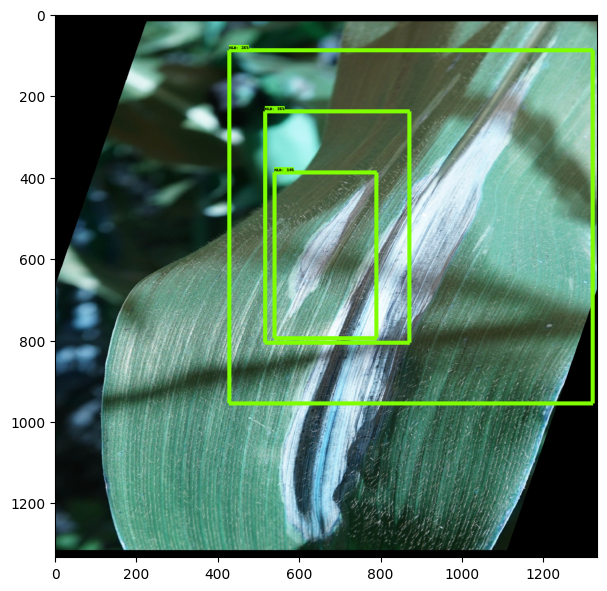

Done printing image


In [4]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
#from cv2 import imshow
from matplotlib import pyplot as plt

# Enable GPU dynamic memory allocation
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus:
    #tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/testPVHHRNLB/DSC06671-crop-ShearX.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/exported-models/18-4-2023_13:57:14'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.1)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      line_thickness=10, #This controls the thickness of the bounding box edges
      max_boxes_to_draw=200,
      min_score_thresh=0.1,
      agnostic_mode=False)

#print('Detected Classes')
#print(detections['detection_classes'])

#print('Detection score')
#print(detections['detection_scores'])
print('Done')
# DISPLAYS OUTPUT IMAGE
fig = plt.figure(figsize=(7, 13))
plt.imshow(image_with_detections)
plt.show() #Uncomment to show image with predicted bounding boxes
print('Done printing image')

# CLOSES WINDOW ONCE KEY IS PRESSED
#cv2.waitKey(0)


# Evaluation the trained model with test data => Check lines of the config file

In [17]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
from datetime import datetime;
from pytz import timezone
startTime = datetime.now(timezone('Africa/Addis_Ababa'))
timeinString = startTime.strftime('%Y-%m-%d %H:%M:%S')
print('The trained model started evalution at ' +str(startTime))
#modelLocation='models/my_faster_rcnn_inception_resnet_v2'+timeinString

#Onde test data
#!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python model_main_tf2.py --model_dir=models/my_faster_rcnn_inception_resnet_v2/evalNow --pipeline_config_path=models/my_faster_rcnn_inception_resnet_v2/pipeline.config --checkpoint_dir=models/my_faster_rcnn_inception_resnet_v2/27-4-2023
#Another test data

!/notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/bin/python model_main_tf2.py --model_dir=models/my_faster_rcnn_inception_resnet_v2/eval-GRAY-Original --pipeline_config_path=models/my_faster_rcnn_inception_resnet_v2/pipeline-GRAY.config --checkpoint_dir=models/my_faster_rcnn_inception_resnet_v2/GRAY-4000
endTime = datetime.now(timezone('Africa/Addis_Ababa'))
timeDifference=endTime-startTime
timeDifferenceInSeconds = timeDifference.total_seconds()
print('The trained model finished evalution at ' +str(endTime) )
print('The evaluation time in seconds is: '+str(timeDifferenceInSeconds))

/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo
The trained model started evalution at 2023-08-12 01:21:09.042093+03:00
2023-08-11 22:21:09.469670: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 22:21:10.270357: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /notebooks/fasterRCNNRealMaizeNLB/fasterRCNNRealMaizeNLB-env/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda-11.6/lib64
2023-08-11 22:21:10.270462: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'li

# Checking the evaluation metrics using tensorboard

In [18]:
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/models/my_faster_rcnn_inception_resnet_v2/eval-GRAY-Original
!tensorboard --logdir ./ --bind_all

/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/models/my_faster_rcnn_inception_resnet_v2/eval-GRAY-Original

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.9.1 at http://n7l2lxd1tj:6006/ (Press CTRL+C to quit)
^C


# Data Exploration to compare predicted vs actual bounding boxes

In [5]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

#Exploring the handheld annotations
# read the csv file using read_csv function of pandas
!pwd
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/test
handheldAnnotations = pd.read_csv('annotations_test_HHRNLB.csv')
handheldAnnotations.head()

/notebooks/fasterRCNNRealMaizeNLB
/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/test


,filename,width,height,xmin,ymin,xmax,ymax,class_name
0,DSC00042.JPG,6000,4000,3104,2024,3248,2888,NLB
1,DSC00090.JPG,6000,4000,1804,1324,2544,2176,NLB
2,DSC00100.JPG,6000,4000,2584,1752,3328,3144,NLB
3,DSC00109.JPG,6000,4000,2832,1484,3508,1764,NLB
4,DSC00109.JPG,6000,4000,1596,488,1940,940,NLB


/notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/test
Done printing annotated image


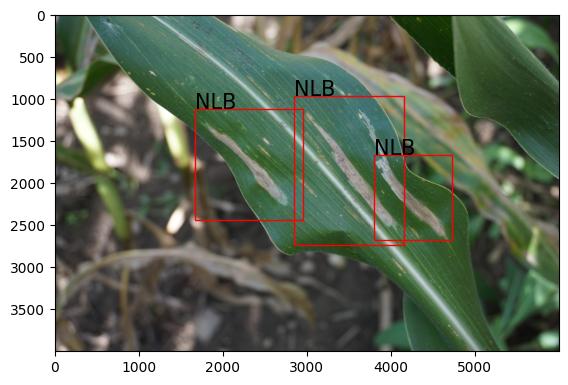

In [12]:
# read and plot the image with its bounding boxes
#handheldAnnotations.head()
%cd /notebooks/fasterRCNNRealMaizeNLB/workspace/training_demo/images/test
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1.5,0.7])

# read and plot the image
image = plt.imread('DSC06378.JPG')
plt.imshow(image)

# iterating over the image for different objects
#print(boomAnnotations)
for _, row in handheldAnnotations[handheldAnnotations.filename == 'DSC06378.JPG'].iterrows():
    #print ('am inside the function. Iteration 1')
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    #print('width and height:' )
    #print(width, height)
    # assign different color to different classes of objects
    if row.class_name == 'NLB':
        #print('testing')
        edgecolor = 'r'
        ax.annotate('NLB', fontsize=15, xy=(xmin,ymin))
    
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none', linewidth=1)
    
    ax.add_patch(rect)
print('Done printing annotated image')